In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [84]:
#Importing Dataset

Dataset = pd.read_csv('winequality-red.csv', sep = ';')  

In [85]:
#Viewing first 5 rows of the dataset
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


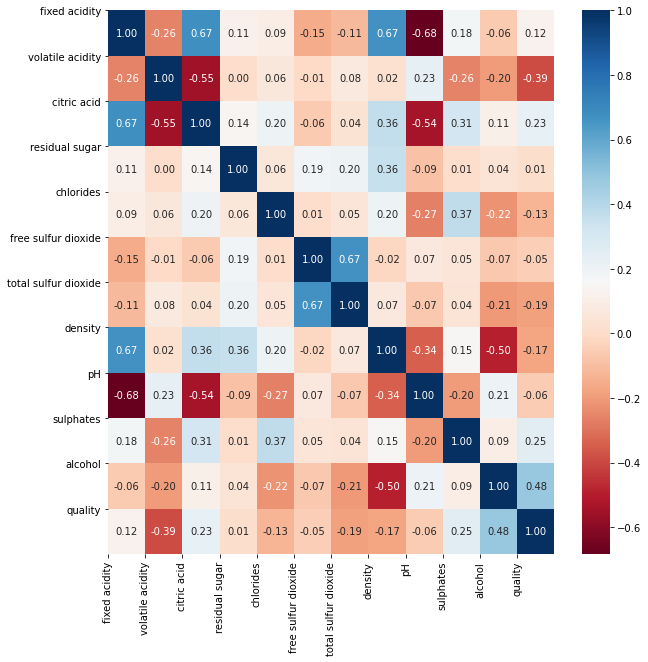

In [86]:
# Visualizing correaltion between columns
corr = Dataset.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [162]:
# Splitting Dataset into Input and Output Set

Data_X = Dataset.iloc[:,:-1]
Data_Y = Dataset['quality']

In [184]:
# Scaling data

sc = StandardScaler()
Data_X = sc.fit_transform(Data_X)

In [185]:
#Splitting data into traiing and testing set

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Data_X, Data_Y, test_size = 0.1)

In [257]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_lr = lr.predict(Xtest)
lr_rmse = (mean_squared_error(Ytest, pred_lr))**0.5
lr_score = r2_score(Ytest, pred_lr)
cv_lr = cross_val_score(estimator = lr, X = Xtrain, y = Ytrain, cv = 10)

print('Linear Regression:')
print('R2 Score:', lr_score)
print('Room Mean Squared Error:', lr_rmse)
print('Cross Validation', cv_lr.mean())

Linear Regression:
R2 Score: 0.31548313629312874
Room Mean Squared Error: 0.6354195415842196
Cross Validation 0.3445243257358036


In [258]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain, Ytrain)

pred_dt = dt.predict(Xtest)
dt_rmse = (mean_squared_error(Ytest, pred_dt))**0.5
dt_score = r2_score(Ytest, pred_dt)
cv_dt = cross_val_score(estimator = dt, X = Xtrain, y = Ytrain, cv = 10)

print('Decision Tree:')
print('R2 Score:', dt_score)
print('Room Mean Squared Error:', dt_rmse)
print('Cross Validation', cv_dt.mean())

Decision Tree:
R2 Score: 0.24768211920529803
Room Mean Squared Error: 0.6661456297237114
Cross Validation 0.09027039597999417


In [259]:
# Support Vector Regressor

from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', gamma = 'scale')
svr.fit(Xtrain, Ytrain)

pred_svr = svr.predict(Xtest)
svr_rmse = (mean_squared_error(Ytest, pred_svr))**0.5
cv_svr = cross_val_score(estimator = svr, X = Xtrain, y = Ytrain, cv = 10)
svr_score = r2_score(Ytest, pred_svr)

print('Support Vector Machine:\n')
print('R2 Score:', svr_score)
print('Room Mean Squared Error:', svr_rmse)
print('Cross Validation', cv_svr.mean())

Support Vector Machine:

R2 Score: 0.4094413208048012
Room Mean Squared Error: 0.590201106345577
Cross Validation 0.39771748774578447


In [266]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 60)
rf.fit(Xtrain, Ytrain)

pred_rf = rf.predict(Xtest)
rf_rmse = (mean_squared_error(Ytest, pred_rf))**0.5
rf_score = r2_score(Ytest, pred_rf)
cv_rf = cross_val_score(estimator = rf, X = Xtrain, y = Ytrain, cv = 10)

print('Random Forest:\n')
print('R2 Score:', rf_score)
print('Room Mean Squared Error:', rf_rmse)
print('Cross Validation', cv_rf.mean())

Random Forest:

R2 Score: 0.5027814569536424
Room Mean Squared Error: 0.5415544755608618
Cross Validation 0.48352977652665885


In [267]:
model = ['Linear Regression', 'Decision Tree','Random Forest', 'Support Vector']
scores = [lr_score, dt_score, rf_score, svr_score]
rmse = [lr_rmse, dt_rmse, rf_rmse, svr_rmse, ]
crv = [cv_lr.mean(), cv_dt.mean(),  cv_rf.mean(), cv_svr.mean()]


In [268]:
res_dict = {
    'Model':model,
    'R2_Score': scores, 
    'RMSE': rmse, 
    'Cross Validation': crv
}
Result = pd.DataFrame(res_dict)
Result

,Model,R2_Score,RMSE,Cross Validation
0,Linear Regression,0.315483,0.635420,0.344524
1,Decision Tree,0.247682,0.666146,0.090270
2,Random Forest,0.502781,0.541554,0.483530
3,Support Vector,0.409441,0.590201,0.397717


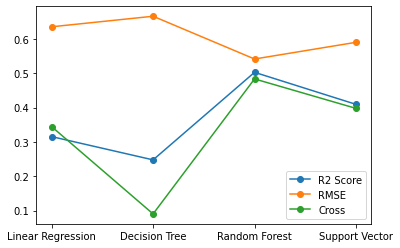

In [271]:
# Plot Scores

plt.plot(model, scores, marker = 'o')
plt.plot(model, rmse, marker = 'o')
plt.plot(model, crv, marker = 'o')
plt.legend(['R2 Score', 'RMSE', 'Cross'])

Text(0, 0.5, 'R2 Score')

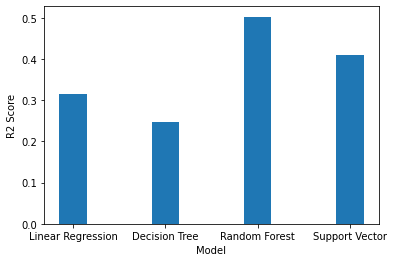

In [270]:
# Plot Scores

plt.bar(model, scores, width = 0.3)
plt.xlabel('Model')
plt.ylabel('R2 Score')

Text(0, 0.5, 'RMSE')

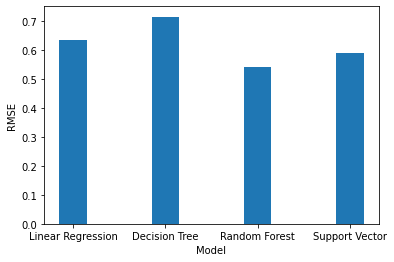

In [249]:
#Plot RMSE 

plt.bar(model, rmse, width = 0.3)
plt.xlabel('Model')
plt.ylabel('RMSE')

Text(0, 0.5, 'CV Score')

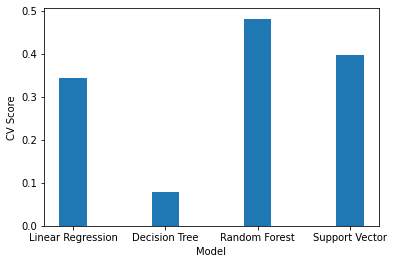

In [250]:
#Plot cross validation score

plt.bar(model, crv, width = 0.3)
plt.xlabel('Model')
plt.ylabel('CV Score')